In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.lines as lines
import math
import sys

In [4]:
infile = "/mnt/fdkbio11/zhangj/support/UMI-nea_paper/benchmark_oN100_20250516/performance.csv"
df = pd.read_csv(infile,sep=",")
read_types = {12:"short_reads", 18:"short_reads", 25:"long_reads", 50:"long_reads"}
df["read_type"] = df["umi_len"].apply(lambda x: read_types[x])
df_cluster = df[["num_founder","read_type","tool","dedup_umi_cluster"]]
df_est = df.loc[df["tool"]=="UMI-nea", ["num_founder","read_type","tool","estimated_molecule"]]
df_est["tool"] = "UMI-nea_est_mol"
df_est["dedup_umi_cluster"] = df_est["estimated_molecule"]
df_est = df_est[["num_founder","read_type","tool","dedup_umi_cluster"]]
df_a = pd.concat([df_cluster, df_est], axis=0)

In [46]:
df_a_gp = df_a.groupby(["num_founder","read_type","tool"])["dedup_umi_cluster"].mean()
df_a_gp = df_a_gp.reset_index()
df_a_gp["dedup_umi_cluster"] = df_a_gp["dedup_umi_cluster"].astype(int)
df_a_gp = df_a_gp.sort_values(by=["num_founder","read_type","tool"])
bar_xcoord = [[-0.29,-0.08,0.11,0.31],[0.71,0.91,1.11,1.31]]
bar_ycoord = [[y for y in df_a_gp.loc[(df_a_gp["num_founder"]==1000) & (df_a_gp["read_type"]=="short_reads"),"dedup_umi_cluster"].tolist()],
             [y for y in df_a_gp.loc[(df_a_gp["num_founder"]==1000) & (df_a_gp["read_type"]=="long_reads"),"dedup_umi_cluster"].tolist()],
             [y for y in df_a_gp.loc[(df_a_gp["num_founder"]==10000) & (df_a_gp["read_type"]=="short_reads"),"dedup_umi_cluster"].tolist()],
             [y for y in df_a_gp.loc[(df_a_gp["num_founder"]==10000) & (df_a_gp["read_type"]=="long_reads"),"dedup_umi_cluster"].tolist()]]
fs=[1000, 10000]
bar_ylim = (((8500,11000),(85000,110000)), ((950,1250),(9000,13000)))

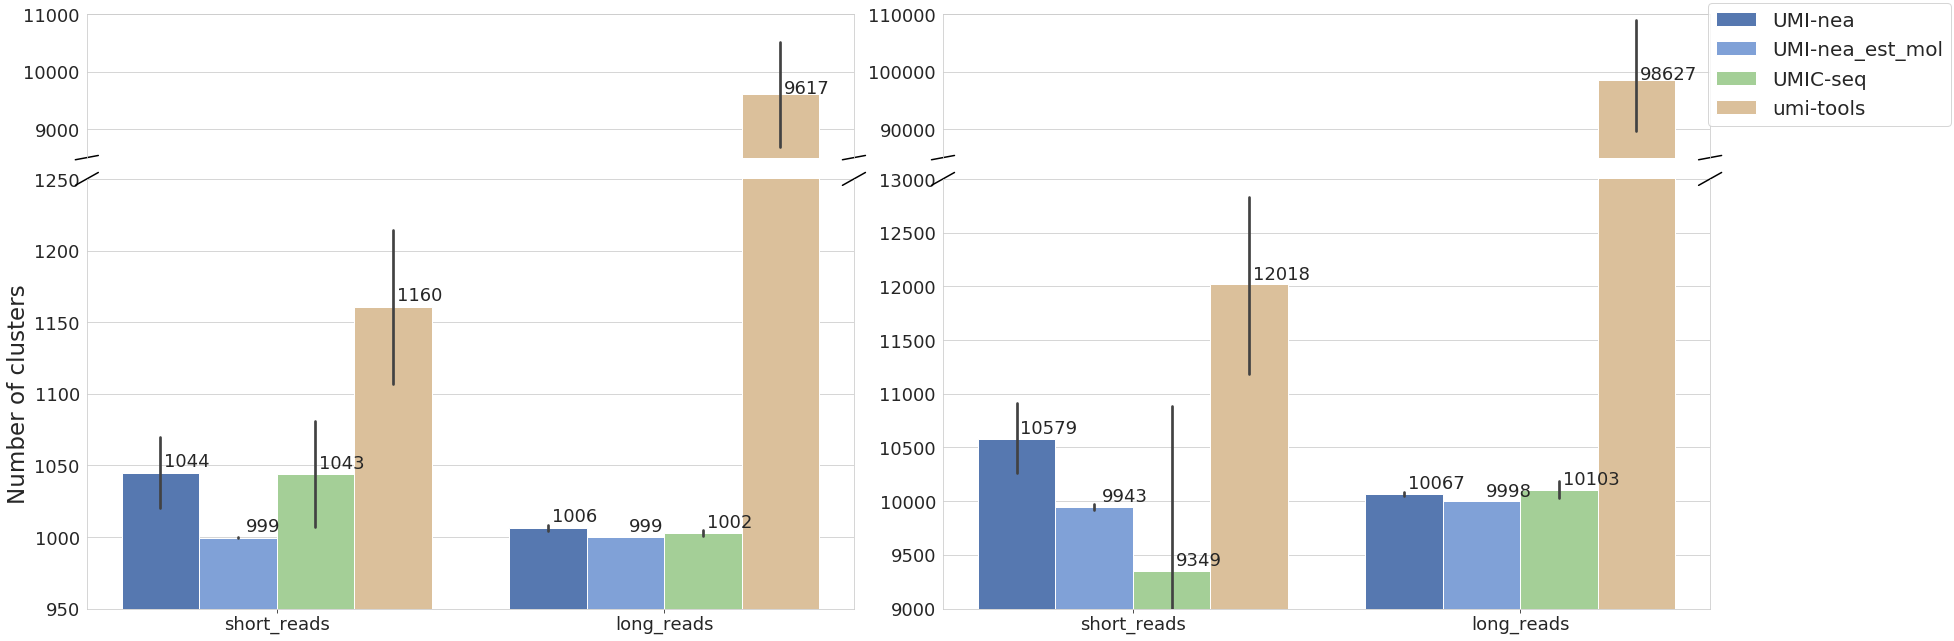

In [65]:
colors = sns.color_palette(["#4775BF", "#719DE5","#9FD88E","#E6C290"])
sns.set_style('whitegrid')
fig, axes = plt.subplots(2, 2, sharex=True, figsize=(24,9), gridspec_kw={'height_ratios': [1, 3]})
for i in range(len(fs)):
    num_f = fs[i]
    df1 = df_a[df_a["num_founder"]==num_f]
    ylim0 = bar_ylim[0][i]
    ylim1 = bar_ylim[1][i]
    sns.barplot(ax=axes[0][i],data=df1, x="read_type", y="dedup_umi_cluster", 
                hue="tool", hue_order=["UMI-nea", "UMI-nea_est_mol", "UMIC-seq", "umi-tools"],
                ci=75, palette=colors)
    sns.barplot(ax=axes[1][i],data=df1, x="read_type", y="dedup_umi_cluster", 
                hue="tool", hue_order=["UMI-nea", "UMI-nea_est_mol", "UMIC-seq", "umi-tools"],
                ci=85, palette=colors)
    for j in range(len(bar_xcoord)):
        for k in range(len(bar_xcoord[j])):
            x_loc = bar_xcoord[j][k]
            y_loc = bar_ycoord[i*2+j][k]+num_f*0.005
            t = str(bar_ycoord[i*2+j][k])
            if y_loc > ylim1[1]:
                axes[0][i].text(x_loc, y_loc, t, fontsize=18)
            else:
                axes[1][i].text(x_loc, y_loc, t, fontsize=18)
    axes[0][i].set(ylim=ylim0)
    axes[1][i].set(ylim=ylim1)
    axes[0][i].spines['bottom'].set_visible(False)
    axes[1][i].spines['top'].set_visible(False)
    axes[0][i].tick_params(labeltop=False,labelsize=18)
    axes[1][i].tick_params(labelsize=18)
    axes[1][i].xaxis.tick_bottom()
    axes[0][i].get_legend().remove()
    axes[1][i].get_legend().remove()
    axes[0][i].set_xlabel("")
    axes[1][i].set_xlabel("")
    axes[0][i].set_ylabel("")
    if i == 0:
        axes[1][i].set_ylabel("Number of clusters", fontsize=23)
        lines, labels = axes[1][i].get_legend_handles_labels()
    else:
        axes[1][i].set_ylabel("")
    d = .015
    kwargs = dict(transform=axes[0][i].transAxes, color='k', clip_on=False)
    axes[0][i].plot((-d, +d), (-d, +d), **kwargs)
    axes[0][i].plot((1 - d, 1 + d), (-d, +d), **kwargs)
    kwargs.update(transform=axes[1][i].transAxes)
    axes[1][i].plot((-d, +d), (1 - d, 1 + d), **kwargs)
    axes[1][i].plot((1 - d, 1 + d), (1 - d, 1 + d), **kwargs)
fig.tight_layout()
fig.legend(lines, labels, loc='upper right', bbox_to_anchor=(1.135,1), fontsize=20)

In [33]:
infile = "/mnt/fdkbio11/zhangj/support/UMI-nea_paper/benchmark_oN100_20250516/performance.csv"
df = pd.read_csv(infile,sep=",")
read_types = {12:"short_reads", 18:"short_reads", 25:"long_reads", 50:"long_reads"}
df["read_type"] = df["umi_len"].apply(lambda x: read_types[x])
nf = {1000:"1,000",10000:"10,000"}
df["num_founder"] = df["num_founder"].apply(lambda x: nf[x])
df_b = df[["num_founder","read_type","tool","V-measure"]]

tools_ord = ["UMI-nea","umi-tools","UMIc-seq","calib"]
df_b_gp = df_b.groupby(["num_founder","read_type","tool"])["V-measure"].mean()
df_b_gp = df_b_gp.reset_index()
df_b_gp['tool'] = pd.Categorical(df_b_gp['tool'],categories=tools_ord,ordered=True)
df_b_gp = df_b_gp.sort_values(by=["num_founder","read_type","tool"])
df_b_gp = df_b_gp.round(4)
df_b_gp

,num_founder,read_type,tool,V-measure
0,"1,000",long_reads,UMI-nea,1.0000
3,"1,000",long_reads,umi-tools,0.9487
1,"1,000",long_reads,UMIc-seq,0.9940
2,"1,000",long_reads,calib,0.9166
4,"1,000",short_reads,UMI-nea,0.9997
7,"1,000",short_reads,umi-tools,0.9993
5,"1,000",short_reads,UMIc-seq,0.9930
6,"1,000",short_reads,calib,0.9948
8,"10,000",long_reads,UMI-nea,1.0000
11,"10,000",long_reads,umi-tools,0.9604


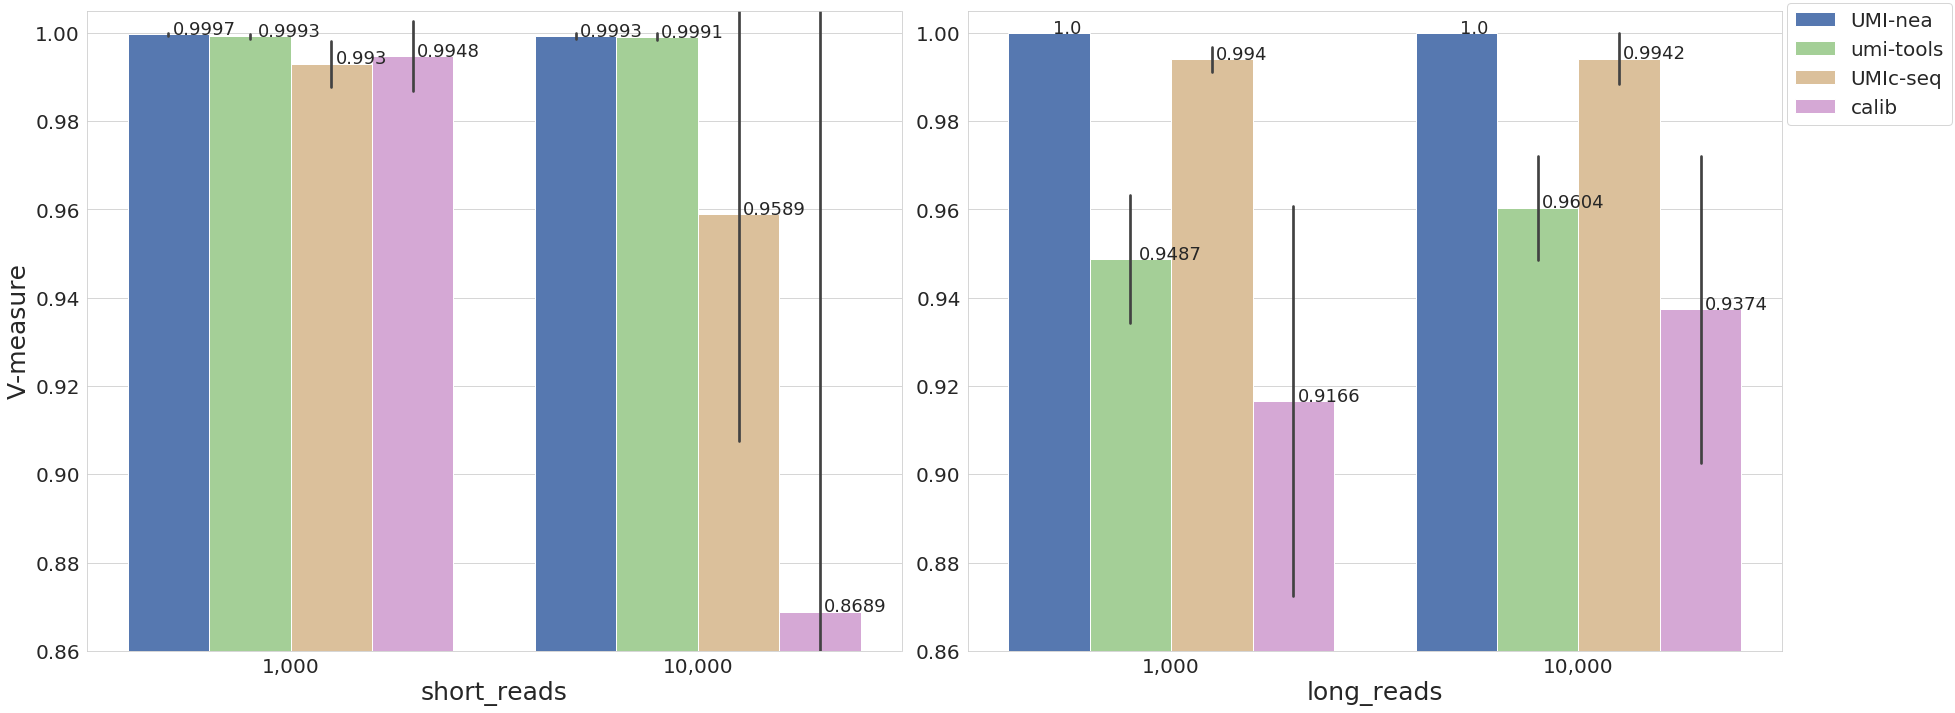

In [35]:
bar_xcoord = [[-0.29,-0.08,0.11,0.31],[0.71,0.91,1.11,1.31]]
bar_ycoord = [[y for y in df_b_gp.loc[(df_b_gp["num_founder"]=="1,000") & (df_b_gp["read_type"]=="short_reads"),"V-measure"].tolist()],
             [y for y in df_b_gp.loc[(df_b_gp["num_founder"]=="10,000") & (df_b_gp["read_type"]=="short_reads"),"V-measure"].tolist()],
             [y for y in df_b_gp.loc[(df_b_gp["num_founder"]=="1,000") & (df_b_gp["read_type"]=="long_reads"),"V-measure"].tolist()],
             [y for y in df_b_gp.loc[(df_b_gp["num_founder"]=="10,000") & (df_b_gp["read_type"]=="long_reads"),"V-measure"].tolist()]]

colors = sns.color_palette(["#4775BF","#9FD88E","#E6C290","#DDA0DD"])
rtypes = ["short_reads","long_reads"]
fig, axes = plt.subplots(1,2, figsize = (25,10), frameon=True)
sns.set_style('whitegrid')
for i in range(len(rtypes)):
    rt = rtypes[i]
    df1 = df_b[df_b["read_type"]==rt]
    sns.barplot(ax=axes[i],data=df1, x="num_founder", y="V-measure", 
                hue="tool",hue_order=tools_ord,
                ci="sd", palette=colors)
    for j in range(len(bar_xcoord)):
        for k in range(len(bar_xcoord[j])):
            x_loc = bar_xcoord[j][k]
            y_loc = bar_ycoord[i*2+j][k]
            t = str(bar_ycoord[i*2+j][k])
            axes[i].text(x_loc, y_loc, t, fontsize=18)
    if i < len(fs)-1:
        lines, labels = axes[i].get_legend_handles_labels()
    if i > 0:
        axes[i].set_ylabel("")
    else:
        axes[i].set_ylabel("V-measure", fontsize=25)
    axes[i].get_legend().remove()
    axes[i].set(ylim=(0.86,1.005))
    axes[i].set_xlabel(rt,fontsize=25)
    axes[i].tick_params(axis='both', which='major', labelsize=20)
fig.tight_layout()
fig.legend(lines, labels, loc='upper right', bbox_to_anchor=(1.09,1), fontsize=20)

In [5]:
#bar_xcoord = [[-0.25,0.01,0.28],[0.74,1.01,1.28]]
bar_xcoord = [[-0.29,-0.08,0.11,0.31],[0.71,0.91,1.11,1.31]]
bar_ycoord = [[y for y in df_b_gp.loc[(df_b_gp["num_founder"]==1000) & (df_b_gp["read_type"]=="short_reads"),"V-measure"].tolist()],
             [y for y in df_b_gp.loc[(df_b_gp["num_founder"]==1000) & (df_b_gp["read_type"]=="long_reads"),"V-measure"].tolist()],
             [y for y in df_b_gp.loc[(df_b_gp["num_founder"]==10000) & (df_b_gp["read_type"]=="short_reads"),"V-measure"].tolist()],
             [y for y in df_b_gp.loc[(df_b_gp["num_founder"]==10000) & (df_b_gp["read_type"]=="long_reads"),"V-measure"].tolist()]]

colors = sns.color_palette(["#4775BF","#9FD88E","#DDA0DD","#E6C290"])

fs=[1000, 10000]

fig, axes = plt.subplots(1,2, figsize = (25,10), frameon=True)
sns.set_style('whitegrid')
for i in range(len(fs)):
    num_f = fs[i]
    df1 = df_b[df_b["num_founder"]==num_f]
    sns.barplot(ax=axes[i],data=df1, x="read_type", y="V-measure", 
                hue="tool",hue_order=["UMI-nea", "UMIC-seq", "calib", "umi-tools"],
                ci=85, palette=colors)
    for j in range(len(bar_xcoord)):
        for k in range(len(bar_xcoord[j])):
            x_loc = bar_xcoord[j][k]
            y_loc = bar_ycoord[i*2+j][k]
            t = str(bar_ycoord[i*2+j][k])
            axes[i].text(x_loc, y_loc, t, fontsize=18)
    if i < len(fs)-1:
        lines, labels = axes[i].get_legend_handles_labels()
    if i > 0:
        axes[i].set_ylabel("")
    else:
        axes[i].set_ylabel("V-measure", fontsize=25)
    axes[i].get_legend().remove()
    axes[i].set(ylim=(0.86,1.005))
    axes[i].set_xlabel("read types",fontsize=25)
    axes[i].tick_params(axis='both', which='major', labelsize=20)
fig.tight_layout()
fig.legend(lines, labels, loc='upper right', bbox_to_anchor=(1.09,1), fontsize=20)